In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('Multiple Sclerosis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
import glob
data_dir = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis'  # Replace with the correct path if needed
folders=os.listdir(data_dir)
image_paths = []
labels = []

for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for ext in ['*.jpg', '*.png']:  # Modify extensions if necessary
            image_paths.extend(glob.glob(os.path.join(folder_path, ext)))
            labels.extend([folder] * len(glob.glob(os.path.join(folder_path, ext))))

In [4]:
train_paths, valid_paths, train_labels, valid_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)


In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
import pandas as pd
train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels})
valid_df = pd.DataFrame({'filename': valid_paths, 'class': valid_labels})


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [8]:
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 686 validated image filenames belonging to 4 classes.


In [9]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2741 validated image filenames belonging to 4 classes.


In [10]:
size = []

# Loop through all images in the train_df DataFrame
for file_path in train_df['filename']:
    # Load the image
    image = plt.imread(file_path)
    
    # Append the shape (size) of the image
    size.append(image.shape)

# Create a pandas Series and count the occurrences of each image size
pd.Series(size).value_counts()


(569, 1158, 4)    2224
(638, 1222, 4)     329
(628, 1158, 4)     130
(695, 1222, 4)      39
(661, 1493, 4)      12
(618, 758, 4)        2
(719, 1493, 4)       2
(606, 722, 4)        1
(515, 450, 4)        1
(687, 912, 4)        1
dtype: int64

In [11]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [12]:
import cv2


In [13]:
s = 224


In [14]:


x_train = []
y_train = []
# Iterate over the rows of the DataFrame
for index, row in train_df.iterrows():
    file_path = row['filename']  # Image file path
    label = row['class']         # Corresponding class label
    
    # Read the image using OpenCV
    image = cv2.imread(file_path)
    
    # Resize the image to the target size (s, s)
    image_array = cv2.resize(image, (s, s))
    
    # Append the image and its label to the training data lists
    x_train.append(image_array)
    y_train.append(label)
    
# Convert the lists to numpy arrays for further processing
x_train = np.array(x_train)
y_train = np.array(y_train)


In [15]:
print(f'we have {len(x_train)} in x_train')

we have 2741 in x_train


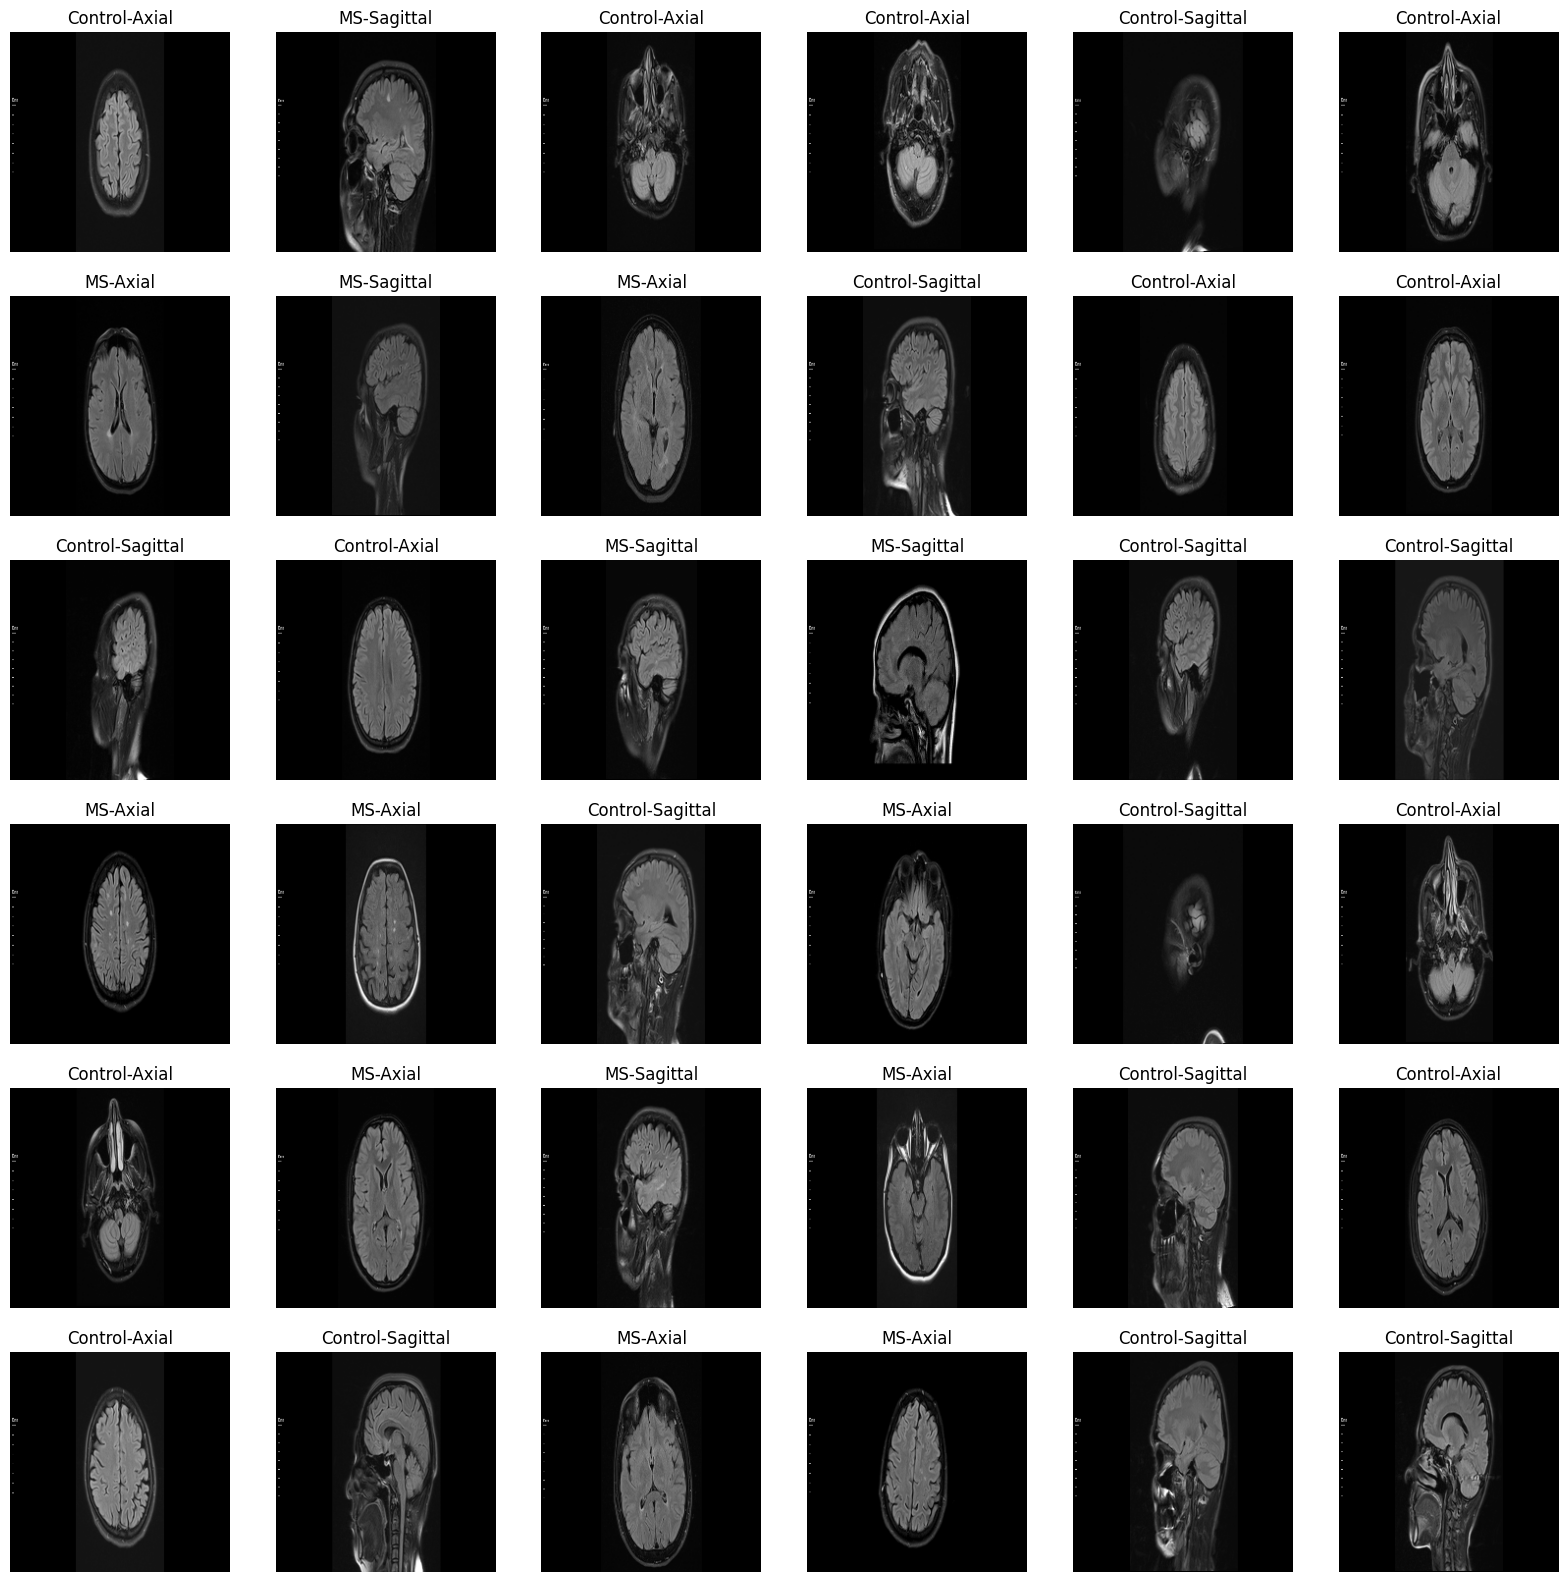

In [19]:
plt.figure(figsize=(20,20))

# Assuming y_train contains class names directly (like 'control axial', 'control sagittal')
for n, i in enumerate(list(np.random.randint(0, len(x_train), 36))):
    plt.subplot(6, 6, n+1)
    
    # Display the image
    plt.imshow(x_train[i])
    
    # Remove axis ticks
    plt.axis('Off')
    
    # Set the title as the class name (e.g., 'control axial', 'control sagittal')
    plt.title(y_train[i], fontsize=12)

plt.show()


In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (2741, 224, 224, 3)
y_train shape is (2741,)


In [21]:
from keras.layers import MaxPooling2D,Dropout


In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Found 2741 validated image filenames belonging to 4 classes.
Found 686 validated image filenames belonging to 4 classes.
Epoch 1/30
86/86 [==============================] - 289s 3s/step - loss: 1.4153 - accuracy: 0.3013 - val_loss: 1.3617 - val_accuracy: 0.3017
Epoch 2/30
86/86 [==============================] - 275s 3s/step - loss: 1.3669 - accuracy: 0.3167 - val_loss: 1.3535 - val_accuracy: 0.3338
Epoch 3/30
86/86 [==============================] - 273s 3s/step - loss: 1.3633 - accuracy: 0.3200 - val_loss: 1.3468 - val_accuracy: 0.2945
Epoch 4/30
86/86 [==============================] - 281s 3s/step - loss: 1.3532 - accuracy: 0.3200 - val_loss: 1.3304 - val_accuracy: 0.3703
Epoch 5/30
86/86 [==============================] - 269s 3s/step - loss: 1.3460 - accuracy: 0.3141 - val_loss: 1.3219 - val_accuracy: 0.3265
Epoch 6/30
86/86 [==============================] - 293s 3s/step - loss: 1.3483 - accuracy: 0.3148 - val_loss: 1.3194 - val_accuracy: 0.3382
Epoch 7/30
86/86 [===============

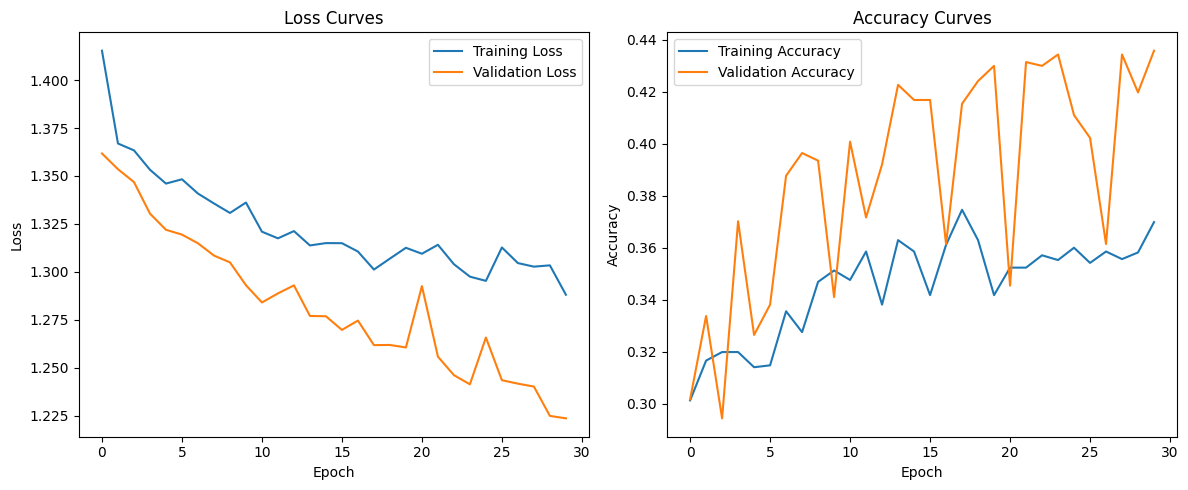

In [27]:
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the DataFrame train_df contains the training data, and valid_df contains validation data.
# Also, ensure num_classes = 4 is set correctly based on your dataset.

# ImageDataGenerator for Training and Validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load the data from DataFrame using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(s, s),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filename',
    y_col='class',
    target_size=(s, s),
    batch_size=32,
    class_mode='categorical'
)

# Number of classes (adjust as per your dataset)
num_classes = len(train_generator.class_indices)  # Get the number of classes from class_indices

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(s, s, 3))

# Freeze the pre-trained model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=2)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()

In [38]:
from tensorflow.keras.models import load_model
model.save("ResNet50.h5")

In [39]:
# Load the trained model
from keras.models import load_model
model=load_model("ResNet50.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Axial\MS-A (3).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
class_names = ['Control-Axial', 'Control-Sagittal', 'MS-Axial', 'MS-Sagittal']
predicted_class = class_names[predicted_label[0]]

# Print the predicted class
print(f'Predicted class: {predicted_class}')

# Check if the predicted class is MS
if predicted_class in ['MS-Axial', 'MS-Sagittal']:
    print('This person has Multiple Sclerosis (MS)')
else:
    print('This person does not have Multiple Sclerosis (MS)')

1/1 [==============================] - 2s 2s/step
Predicted class: Control-Axial
This person does not have Multiple Sclerosis (MS)


In [2]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("ResNet50.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\MS-Sagittal\MS-S (6).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
class_names = ['Control-Axial', 'Control-Sagittal', 'MS-Axial', 'MS-Sagittal']
predicted_class = class_names[predicted_label[0]]

# Print the predicted class
print(f'Predicted class: {predicted_class}')

# Check if the predicted class is MS
if predicted_class in ['MS-Axial', 'MS-Sagittal']:
    print('This person has Multiple Sclerosis (MS)')
else:
    print('This person does not have Multiple Sclerosis (MS)')

1/1 [==============================] - 2s 2s/step
Predicted class: MS-Sagittal
This person has Multiple Sclerosis (MS)


In [4]:
import cv2
import numpy as np
from keras.models import load_model
model=load_model("ResNet50.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (11).png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
class_names = ['Control-Axial', 'Control-Sagittal', 'MS-Axial', 'MS-Sagittal']
predicted_class = class_names[predicted_label[0]]

# Print the predicted class
print(f'Predicted class: {predicted_class}')

# Check if the predicted class is MS
if predicted_class in ['MS-Axial', 'MS-Sagittal']:
    print('This person has Multiple Sclerosis (MS)')
else:
    print('This person does not have Multiple Sclerosis (MS)')

1/1 [==============================] - 6s 6s/step
Predicted class: Control-Sagittal
This person does not have Multiple Sclerosis (MS)


In [10]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
model=load_model("ResNet50.h5")

# Load the image to be predicted
image_path = 'C:\MINOR\Multiple Scelorisis\Dataset\Testing-image.png'
image = cv2.imread(image_path)

# Preprocess the image
image = cv2.resize(image, (224, 224))
image = image / 255.0

# Add a batch dimension to the image
image = np.expand_dims(image, axis=0)

# Make predictions using the trained model
predictions = model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(predictions, axis=1)

# Convert the predicted label to the corresponding class name
class_names = ['Control-Axial', 'Control-Sagittal', 'MS-Axial', 'MS-Sagittal']
predicted_class = class_names[predicted_label[0]]

# Print the predicted class
print(f'Predicted class: {predicted_class}')

# Check if the predicted class is MS
if predicted_class in ['MS-Axial', 'MS-Sagittal']:
    print('This person has Multiple Sclerosis (MS)')
else:
    print('This person does not have Multiple Sclerosis (MS)')


1/1 [==============================] - 1s 1s/step
Predicted class: MS-Sagittal
This person has Multiple Sclerosis (MS)
